Qualitative variables: This type can’t be expressed as a number and so, it can’t be measured. When considering actual& forcast datasets,Plant column consists with quatitative vairables....

In [1]:
import pandas as pd
import os

In [3]:
data_frames=[]
for i in range(0,31):
    df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

    temp=list(df.columns)

    date = temp[8].date()
    df.columns = df.iloc[0]
    df=df.drop(0)
    df=df.drop(columns=df.columns[-3:],axis=1)
    x=df.iloc[:, 0]

    t=0
    for i in x:
        t=t+1
        if i=='Total MW':

            break
    df=df.iloc[:t-1, :]
    df1 = pd.DataFrame()
    import datetime as dt
    t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    for i in range (1,len(df.columns),2):
        df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]
        t2 = dt.datetime.strptime('00:30:00', '%H:%M:%S')
        time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        x=(t1 - time_zero + t2).time()
        t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
        
    m=df.iloc[:t-1, 0]
    list(m)
    df1.insert(0, 'Power_Plant', m)
    #df2=pd.melt(df1,id_vars=['Power_Plant'])
    #df2['Date']=date
    data_frames.append(df1)

In [4]:
data_frames[0].head()

,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
1,Canyon,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Olax,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,...,104.0,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
4,Nlax,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,...,212.0,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0
5,Polp,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,...,180.0,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0


In [6]:
x_axis=list(data_frames[0]['Power_Plant'])

In [7]:
x_axis

['Canyon',
 'WPS',
 'Olax',
 'Nlax',
 'Polp',
 'Upper Kothmale',
 'Koth',
 'Vict',
 'Rand',
 'Rant',
 'Uku',
 'Bowa',
 'Sam',
 'Kukule',
 'LVPS 1',
 'LVPS 2',
 'LVPS 3',
 'Sapu A',
 'Sapu B',
 'Uthuru Janani',
 'Barge',
 'KCCP',
 'ACE EMBP',
 'ACE Matara',
 'Asia Power',
 'WCP',
 'Sojitz CCP',
 'KPS(GT7)',
 'KPS(GT)',
 'CEB Sup Power',
 'VPOWER Hamb.',
 'VPOWER Palle.',
 'VPOWER Horona',
 'ALTAQQA-Pol.',
 'ALTAQQA-Mahi.',
 'Solar**',
 'Wind **',
 'CEB/IPP Mini Hydro***']

In [9]:
df_new=data_frames[0].set_index('Power_Plant')

In [10]:
df_new.head()

,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
Power_Plant,,,,,,,,,,,,,,,,,,,,,
Canyon,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0
WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Olax,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,66.0,...,104.0,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
Nlax,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,34.0,...,212.0,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0
Polp,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,36.0,...,180.0,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0


In [12]:
max_row_value=df_new.max(axis=1)
y_axis=list(max_row_value)
#y_axis

## Plants vs maximum dispatch values

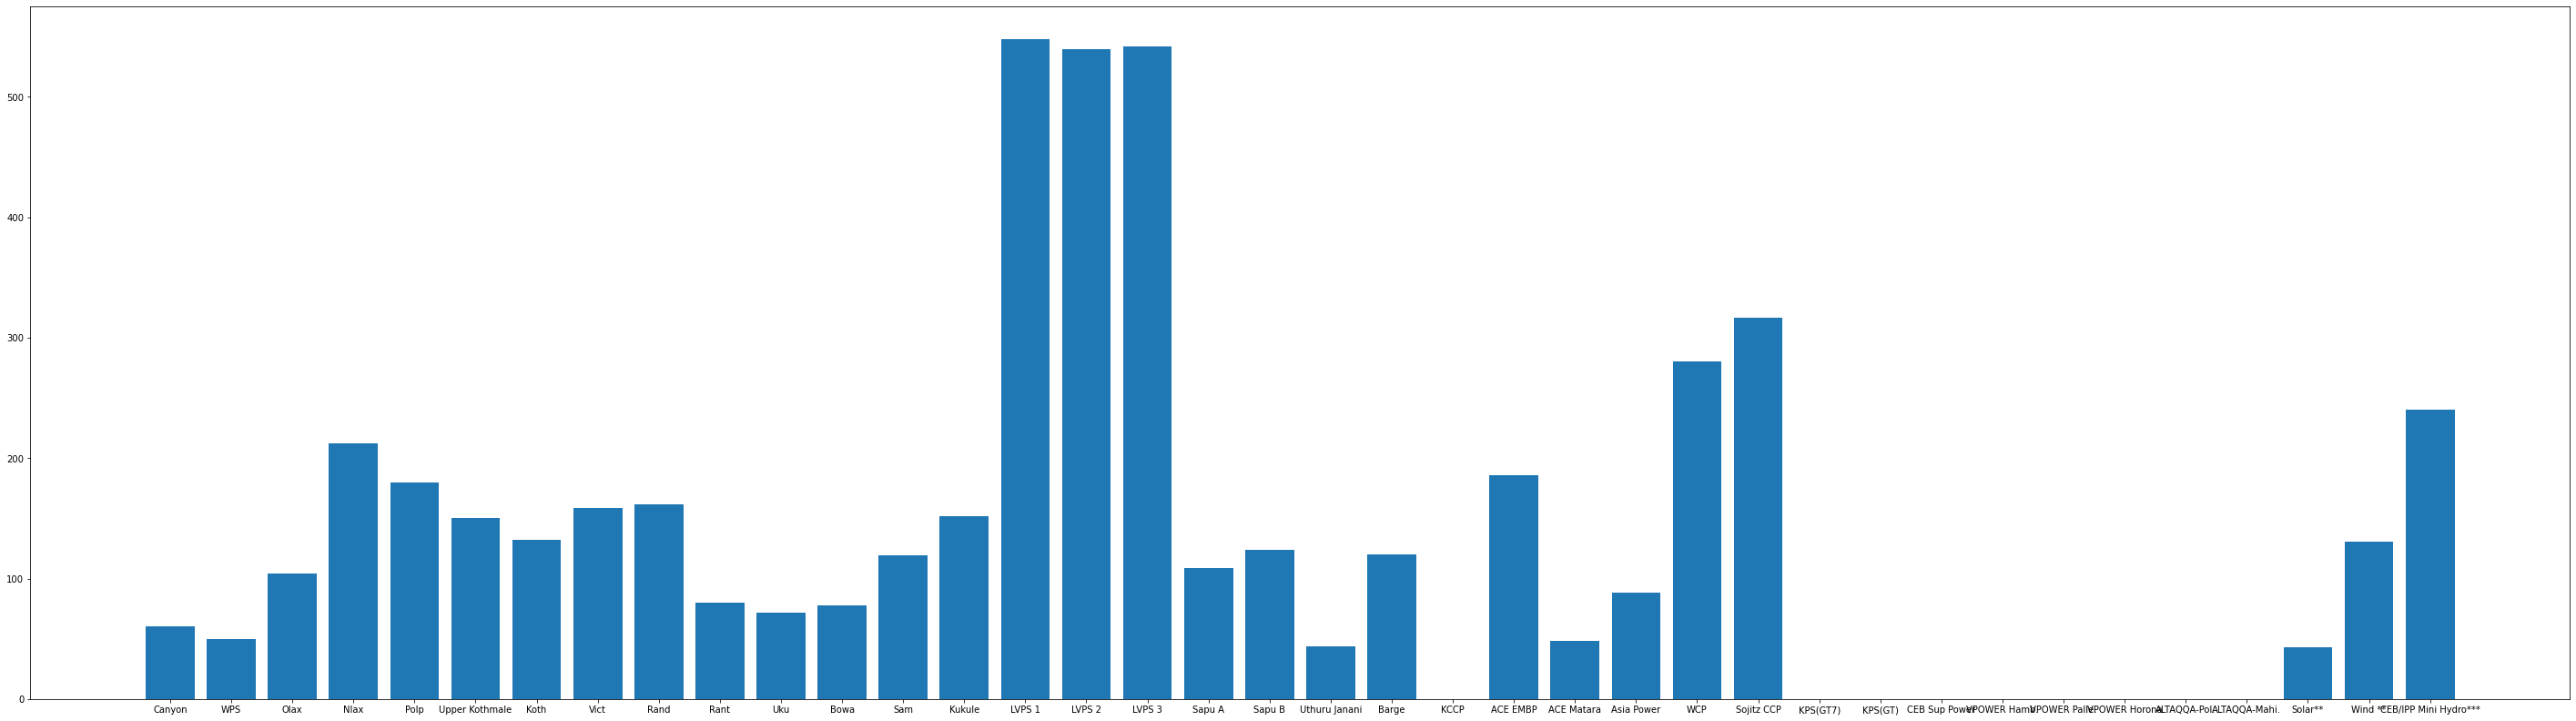

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(50,14))
plt.bar(x_axis,y_axis)
plt.show()

## Plants vs mean dispatch values

In [15]:
mean_row_value=df_new.mean(axis=1)
y_axis_1=list(mean_row_value)
#y_axis_1

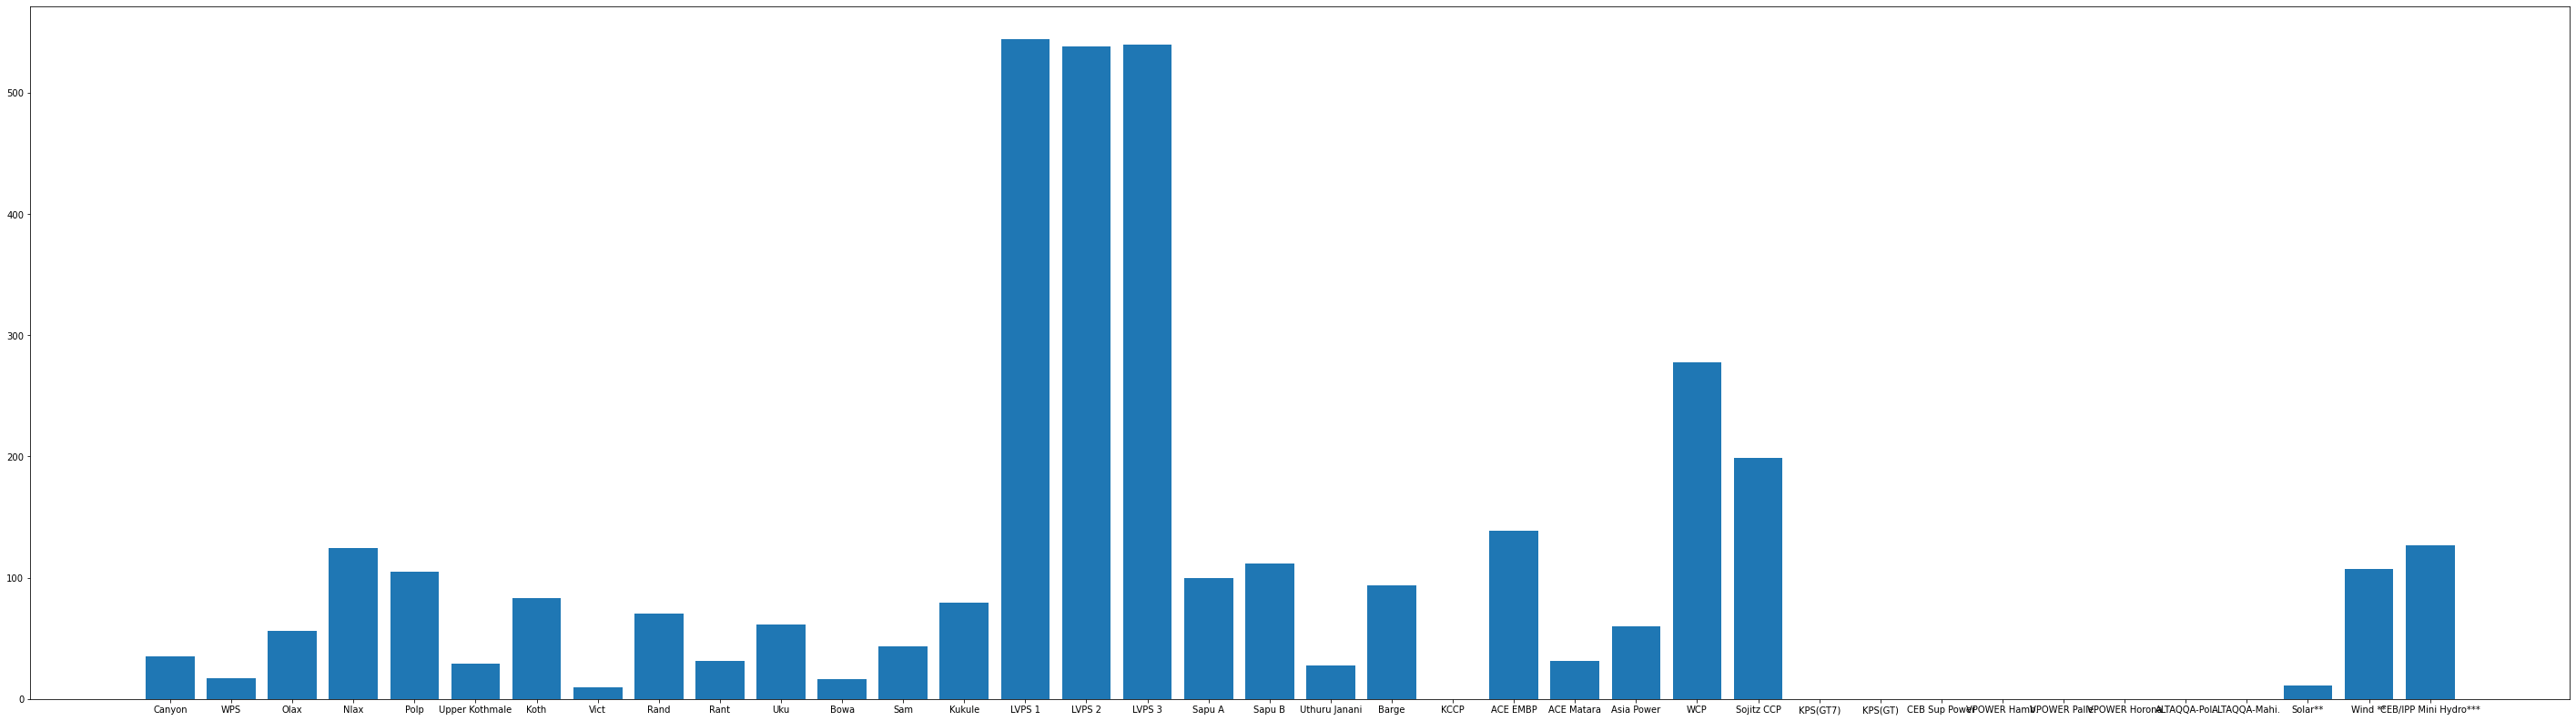

In [16]:
fig1=plt.figure(figsize=(50,14))
plt.bar(x_axis,y_axis_1)
plt.show()

# Forecast

In [18]:
#get all the files in the forecast folder..........
def fileList(path):
    listOfFiles = os.listdir(path)
    files=[]
    
    for file in listOfFiles:
        fullPath = os.path.join(path, file) #full path for the file
        if os.path.isdir(fullPath): #if there are sub folders.....
            files = files + fileList(fullPath) #recursively loop through the sub folder
        else:
            files.append(fullPath)
                
    return files

all_the_files=fileList(r'E:\Desktop\Datasets\forcast_july')

In [19]:
##############
data_frames1=[]
for file in all_the_files:
    df=pd.read_excel(file)
    df.columns = df.iloc[0] #make columns as 0th row items..
    columns=df.columns
    date=columns[1].date() 
    df=df.drop(0) #drop 0th row items
    df.columns = df.iloc[0] #make columns as 0th row items..
    df=df.drop(1)  #drop 1st row items
    plants_temp=df.iloc[:,0] #all the items in plant column(this includes unnessasary items)
    plants=[]
    #get only the correct plants...
    for plant in plants_temp:
        if plant=='Total Generation':
            break
        else:
            plants.append(plant)
    df = df.loc[:, df.columns.notnull()] #remove nan columns.............
    z=len(plants) #only get the relevant rows...............
    df=df.head(z) #only get the dataframe which contains the needed rows...
    df.insert(0, 'Power_Plant', plants)
    df=df.drop(columns=df.columns[-1:],axis=1) #drop the last column.......
    #df=pd.melt(df,id_vars=['Power_Plant']) #reshape the df using melt function...
    #df['Date']=date
    data_frames1.append(df)

In [20]:
data_frames1[0].head()

1,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
2,WPS,0,0,0,0,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
3,Cany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Olax,10,10,10,10,10,10,10,10,10,...,54,10.895,10.895,10,10,10,10,10,10,0
5,Nlax,60.636,60.636,60.636,59.362,59.312,58.312,58.812,59.112,20.212,...,93.636,93.636,60.636,60.636,60.636,21.97,21.97,21.97,0,0
6,Polp,78.479,58.347,31.008,6.1039,6.1039,6.1039,6.1039,6.1039,18.052,...,72.857,56.114,56.114,38.31,38.31,18.933,6.1039,31.762,7.923,0


In [21]:
x_axis1=list(data_frames1[0]['Power_Plant'])

In [24]:
x_axis1

['WPS     ',
 'Cany     ',
 'Olax       ',
 'Nlax',
 'Polp',
 'UKPS',
 'Koth',
 'Victoria',
 'Rand',
 'Rant',
 'Uku',
 'Bowa',
 'Sama',
 'Kukule',
 'PCCP I',
 'PCCP II',
 'PCCP III',
 'KPS',
 'CEB_EMERGENCY',
 'GT 07',
 'SPS A',
 'SPS B',
 'Asia Power',
 'Barge',
 'ACE (Matara)',
 'Ace (Embilipitiya)',
 'NORTHERN_Power',
 'Uthuru_Janani',
 'KCCP GT(N)',
 'KCCP ST(N)',
 'KCCP GT(D)',
 'KCCP ST(D)',
 'Sojitz CCP',
 'WCP_GT1',
 'WCP_GT2',
 'WCP_ST',
 'VPOWER_Palle',
 'ALTAAQ_Mahiya',
 'ALTAAQ_Polon',
 'VPOWER_Hamb',
 'VPOWER_Horana',
 'Wind',
 'Solar',
 'Mini Hydro***']

In [23]:
df_new1=data_frames1[0].set_index('Power_Plant')

In [25]:
df_new1.head()

1,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
Power_Plant,,,,,,,,,,,,,,,,,,,,,
WPS,0,0,0,0,0,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
Cany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olax,10,10,10,10,10,10,10,10,10,10,...,54,10.895,10.895,10,10,10,10,10,10,0
Nlax,60.636,60.636,60.636,59.362,59.312,58.312,58.812,59.112,20.212,20.212,...,93.636,93.636,60.636,60.636,60.636,21.97,21.97,21.97,0,0
Polp,78.479,58.347,31.008,6.1039,6.1039,6.1039,6.1039,6.1039,18.052,19.927,...,72.857,56.114,56.114,38.31,38.31,18.933,6.1039,31.762,7.923,0


In [26]:
max_row_value1=df_new1.max(axis=1)
y_axis2=list(max_row_value1)
#y_axis

# Plants vs maximum dispatch values

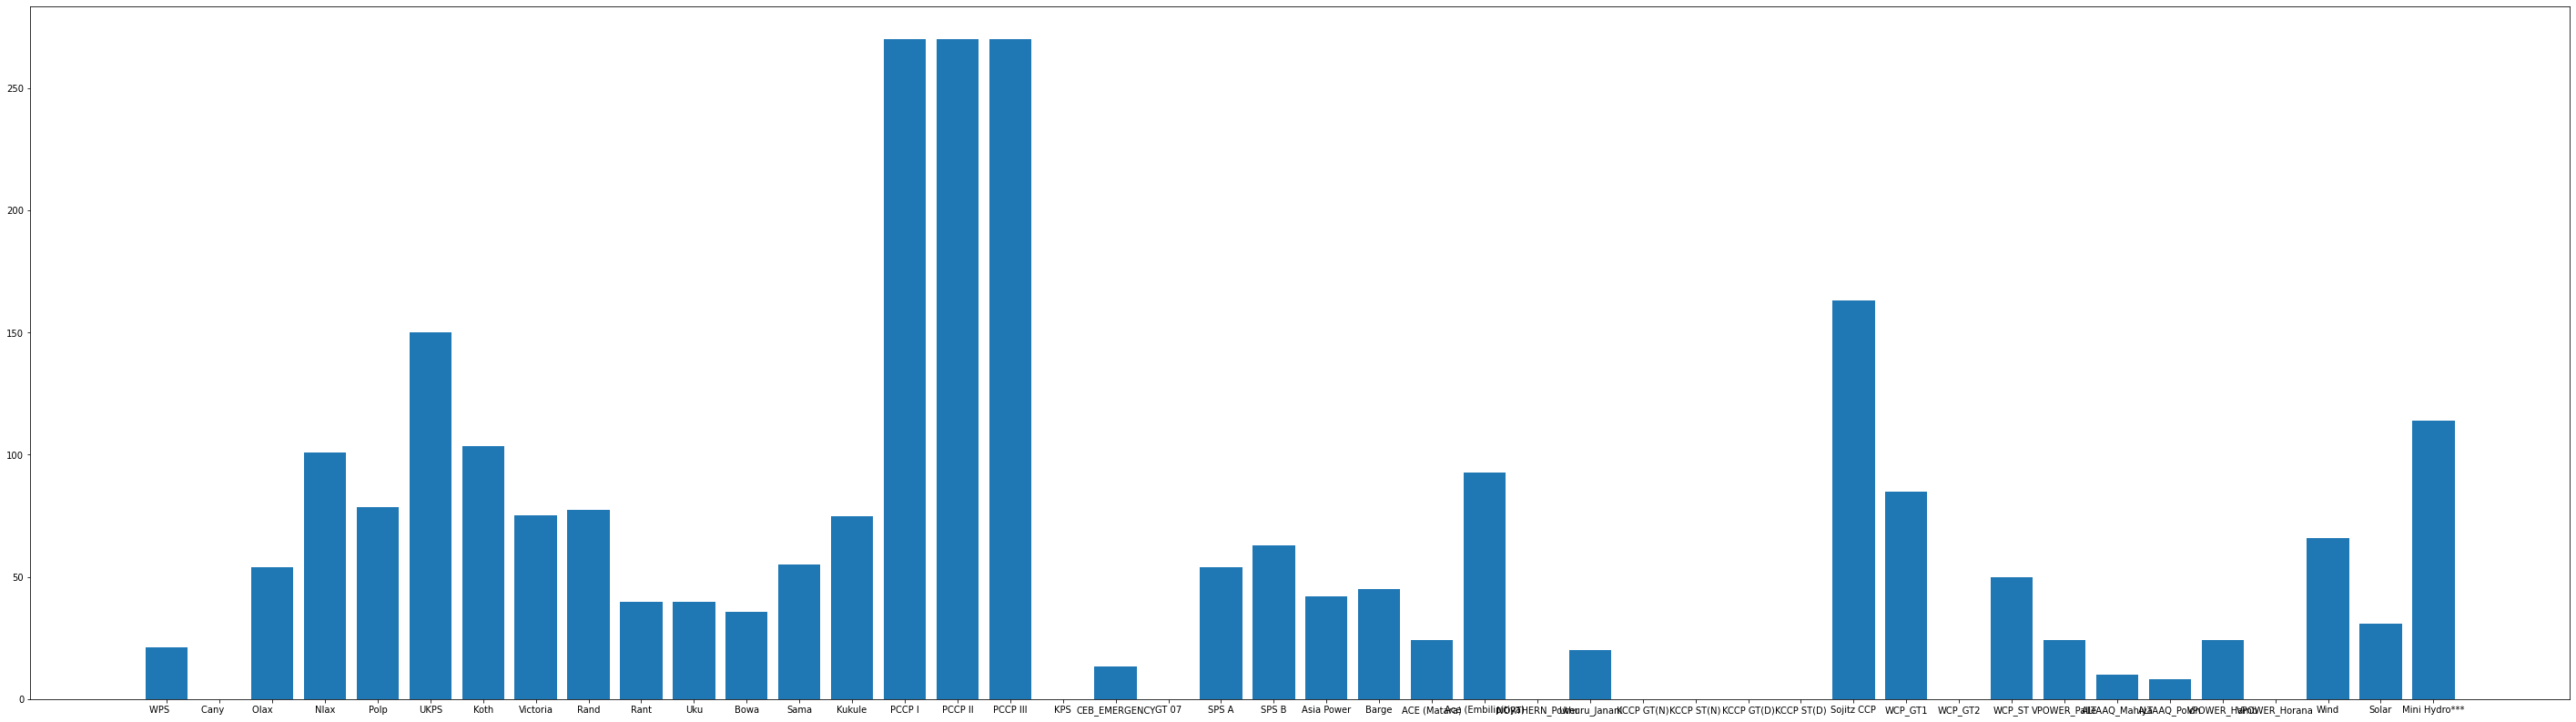

In [28]:
fig2=plt.figure(figsize=(50,14))
plt.bar(x_axis1,y_axis2)
plt.show()

## Plants vs mean dispatch values

In [29]:
mean_row_value1=df_new1.mean(axis=1)
y_axis_3=list(mean_row_value1)
#y_axis_1

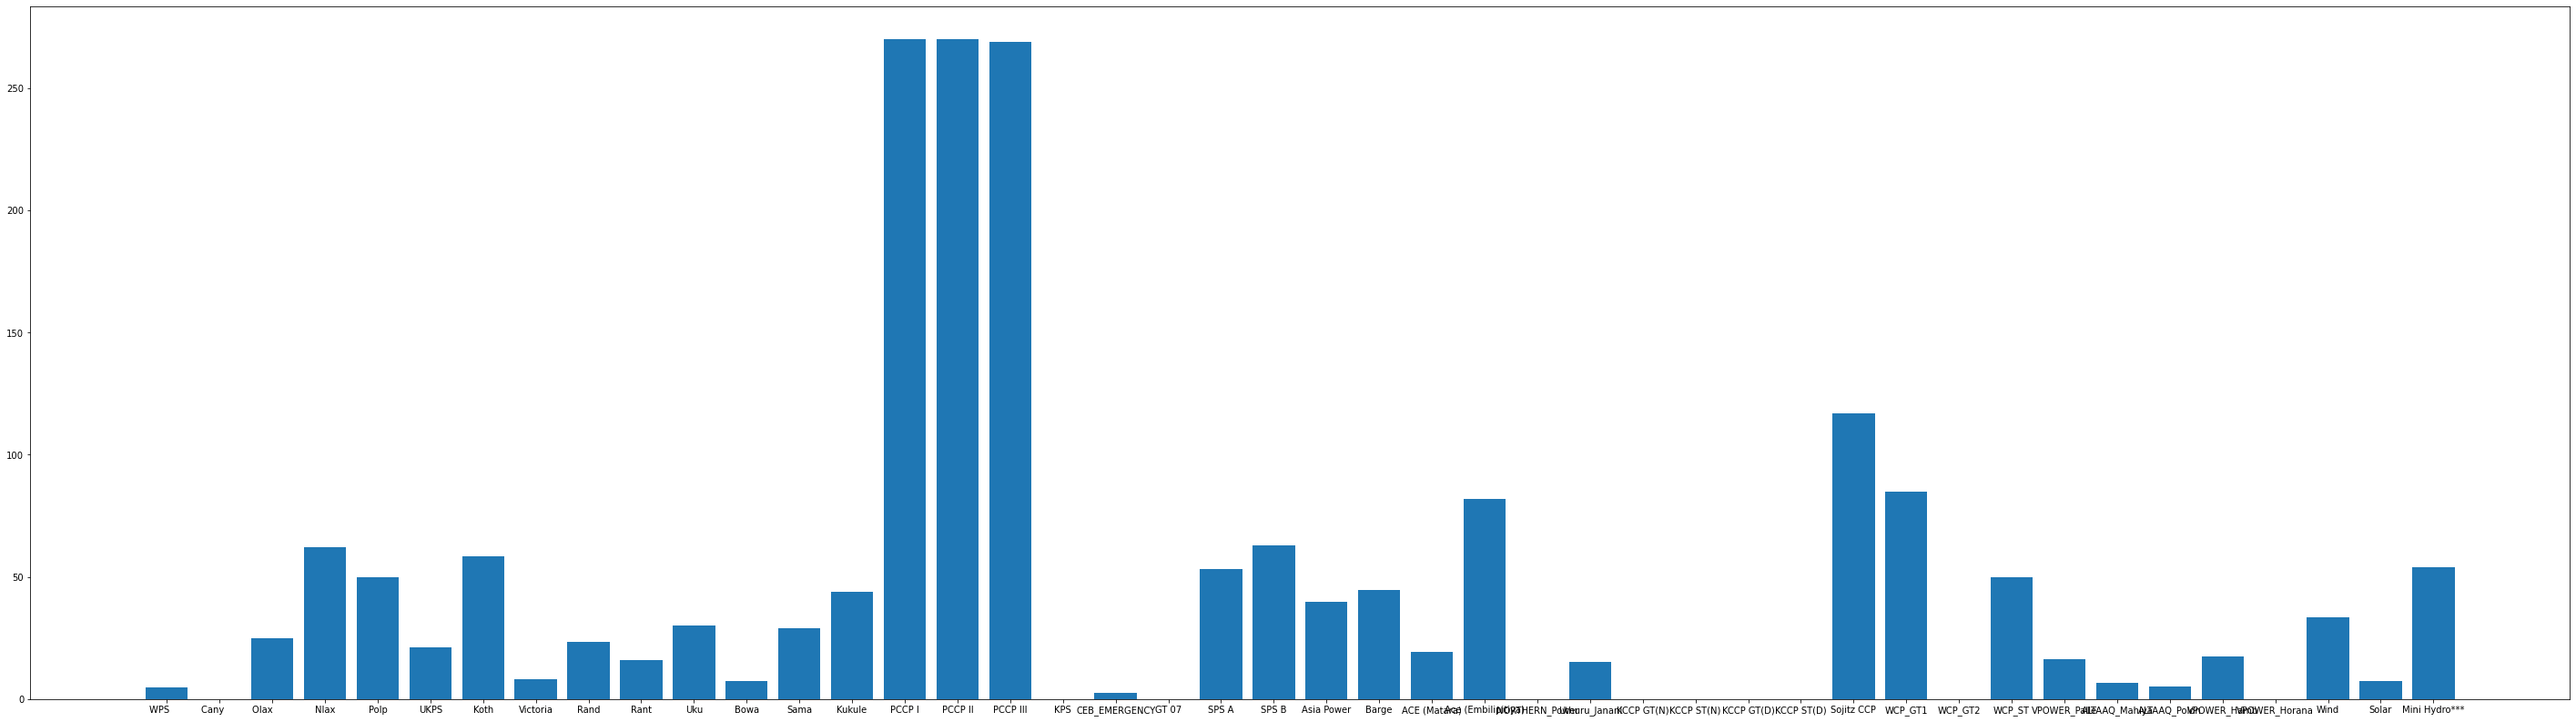

In [30]:
fig3=plt.figure(figsize=(50,14))
plt.bar(x_axis1,y_axis_3)
plt.show()